In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged = pd.read_csv('IS 477 Project/ratings_with_metadata.csv')

merged.head()


,userId,movieId,rating,timestamp,rating_datetime,title,release_year,genres,genres_list
0,1,1,4.0,964982703,2000-07-30 18:45:03,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy..."
1,5,1,4.0,847434962,1996-11-08 06:36:02,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy..."
2,7,1,4.5,1106635946,2005-01-25 06:52:26,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy..."
3,15,1,2.5,1510577970,2017-11-13 12:59:30,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy..."
4,17,1,4.5,1305696483,2011-05-18 05:28:03,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy..."


This cell loads the fully integrated dataset created during Week 4, which already includes movies, ratings, genres, and release years. Importing it directly allows us to begin visual analysis without repeating any cleaning or merging steps.

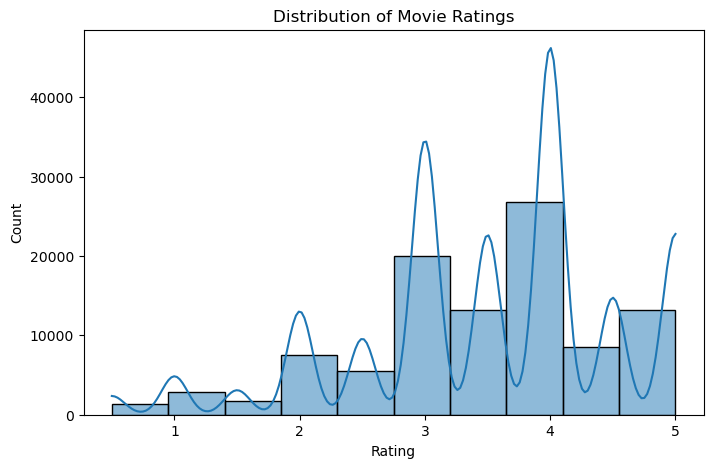

In [2]:
plt.figure(figsize=(8,5))
sns.histplot(merged['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


We start by visualizing the distribution of all ratings to understaWe start by visualizing the distribution of all ratings to understand general user behavior. This histogram helps identify whether ratings are normally distributed, skewed, or clustered around specific values.nd general user behavior. This histogram helps identify whether ratings are normally distributed, skewed, or clustered around specific values.

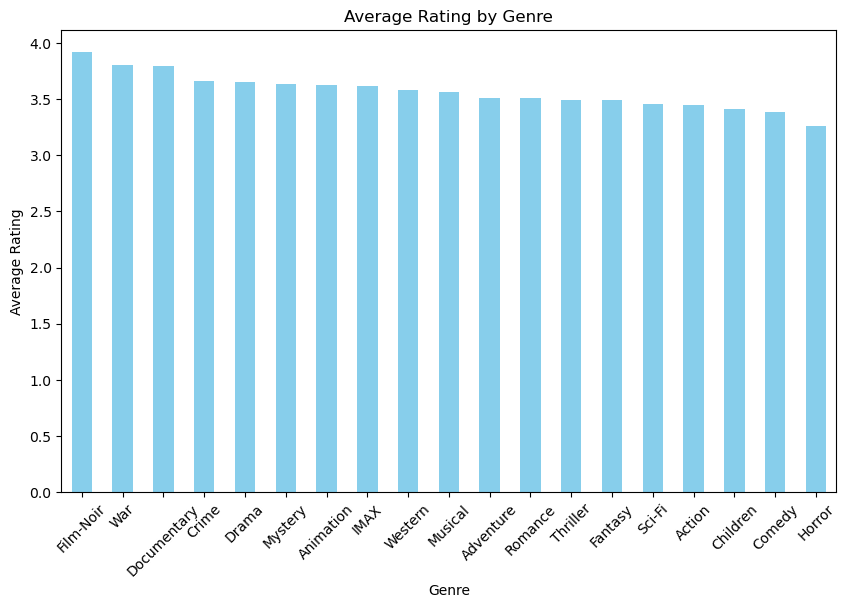

In [7]:
merged['genres_list'] = merged['genres_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

genre_data = merged.explode('genres_list')

genre_data = genre_data[genre_data['genres_list'].notna()]
genre_data = genre_data[genre_data['genres_list'] != '']

avg_genre_ratings = genre_data.groupby('genres_list')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_genre_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()


This cell ensures that the genres_list column is cleaned and converted into a proper Python list so that each individual genre can be analyzed correctly. By using explode(), each genre within a movie becomes its own row rather than keeping entire genre combinations together, which allows us to compute true average ratings per genre. After removing empty or missing entries, we group the data by genre and generate a bar chart showing the average rating for each genre, giving us a clear visualization of which genres tend to receive higher ratings.

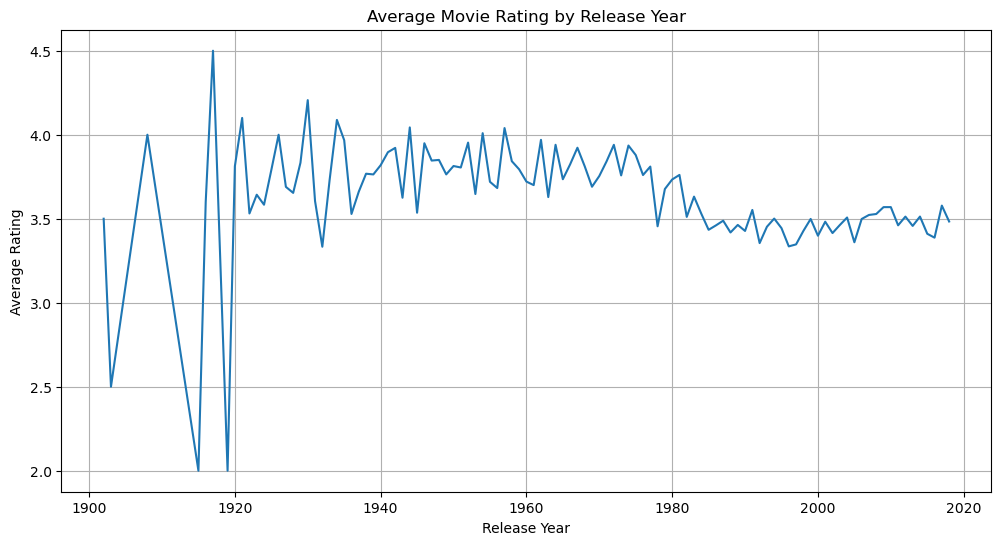

In [5]:
yearly_ratings = merged.groupby('release_year')['rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_ratings.index, yearly_ratings.values)
plt.title("Average Movie Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


This cell examines how movie ratings vary by release year, helping us see long-term trends—such as whether older films receive higher ratings or whether recent movies are rated more favorably. The line plot provides a clear overview of rating changes across decades.

In [8]:
avg_genre_ratings.to_csv('IS 477 Project/avg_genre_ratings.csv')
yearly_ratings.to_csv('IS 477 Project/avg_ratings_by_year.csv')
